In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

import warnings
warnings.filterwarnings("ignore")


In [9]:
url = "https://gist.githubusercontent.com/pravalliyaram/5c05f43d2351249927b8a3f3cc3e5ecf/raw/Mall_Customers.csv"
df = pd.read_csv(url)

# Display first rows
print(df.head())


   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [10]:
print(df.info())
print(df.describe())
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000    

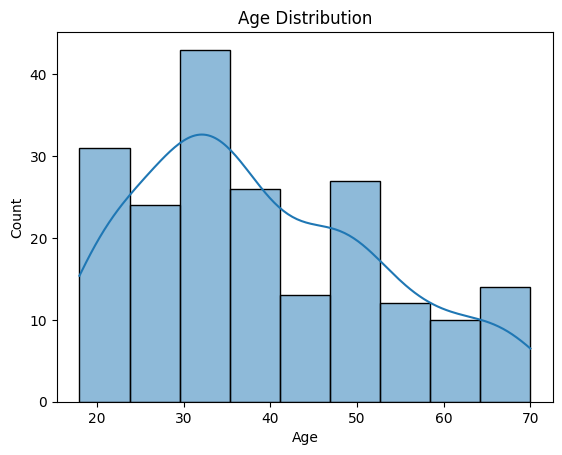

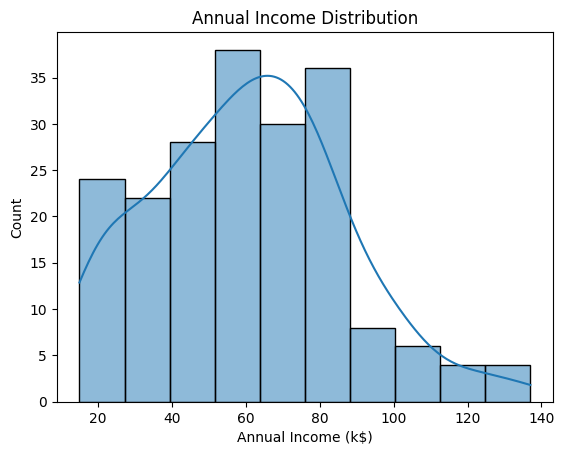

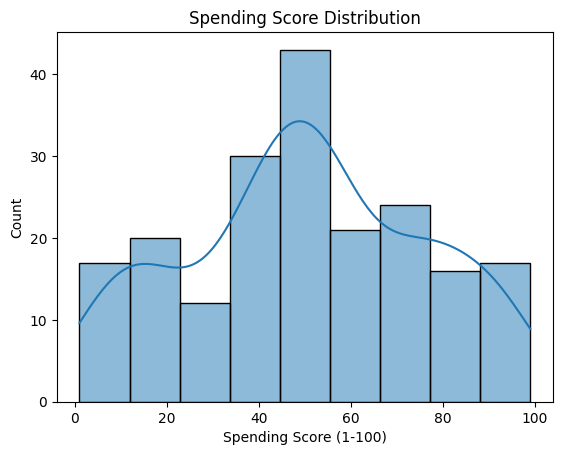

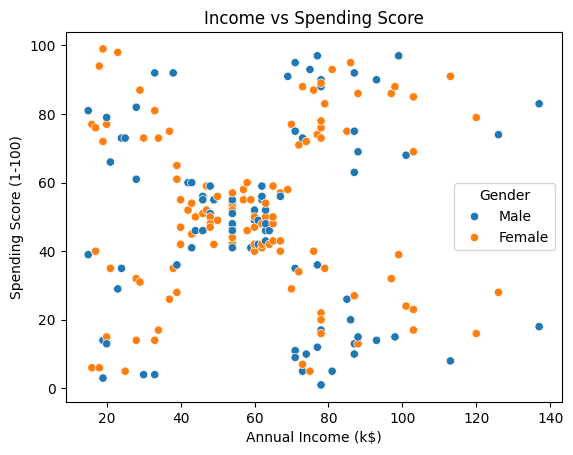

In [11]:
sns.histplot(df["Age"], kde=True).set_title("Age Distribution")
plt.show()

sns.histplot(df["Annual Income (k$)"], kde=True).set_title("Annual Income Distribution")
plt.show()

sns.histplot(df["Spending Score (1-100)"], kde=True).set_title("Spending Score Distribution")
plt.show()

sns.scatterplot(x="Annual Income (k$)", y="Spending Score (1-100)", hue="Gender", data=df)
plt.title("Income vs Spending Score")
plt.show()


In [12]:
X = df[["Annual Income (k$)", "Spending Score (1-100)"]]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


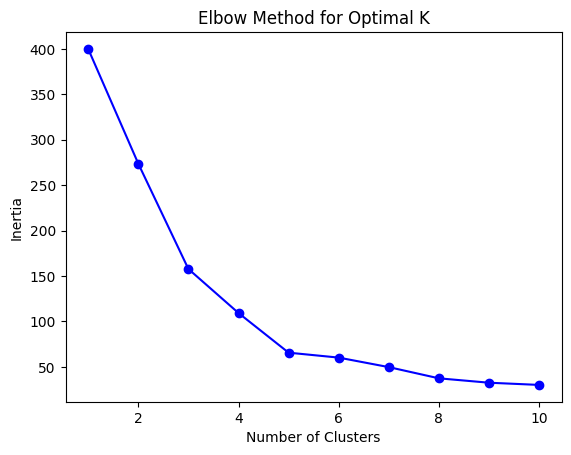

In [13]:
inertia_list = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia_list.append(kmeans.inertia_)

plt.plot(K, inertia_list, 'bo-')
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal K")
plt.show()


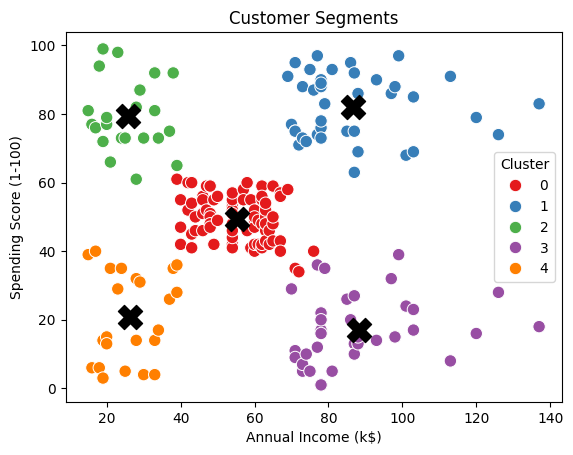

In [14]:
kmeans = KMeans(n_clusters=5, random_state=42)
df["Cluster"] = kmeans.fit_predict(X_scaled)

sns.scatterplot(x="Annual Income (k$)", y="Spending Score (1-100)", hue="Cluster", palette="Set1", data=df, s=80)
plt.scatter(scaler.inverse_transform(kmeans.cluster_centers_)[:,0],
            scaler.inverse_transform(kmeans.cluster_centers_)[:,1],
            s=300, c='black', marker='X', label='Centroids')
plt.title("Customer Segments")
plt.show()


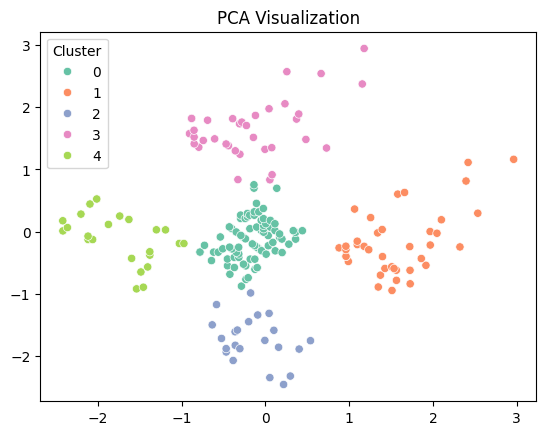

In [15]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=df["Cluster"], palette="Set2")
plt.title("PCA Visualization")
plt.show()


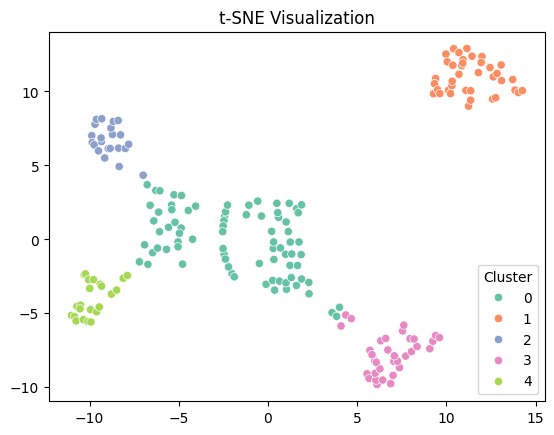

In [16]:
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)
sns.scatterplot(x=X_tsne[:,0], y=X_tsne[:,1], hue=df["Cluster"], palette="Set2")
plt.title("t‑SNE Visualization")
plt.show()


In [17]:
cluster_summary = df.groupby("Cluster")[["Age", "Annual Income (k$)", "Spending Score (1-100)"]].mean()
print(cluster_summary)


               Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                       
0        42.716049           55.296296               49.518519
1        32.692308           86.538462               82.128205
2        25.272727           25.727273               79.363636
3        41.114286           88.200000               17.114286
4        45.217391           26.304348               20.913043


In [18]:
strategy = {
    0: "Low income & low spending → budget offers & loyalty rewards",
    1: "Medium income & high spending → premium upsells",
    2: "High income & high spending → VIP programs",
    3: "High income & low spending → incentives to increase visits",
    4: "Medium income & medium spending → bundle deals"
}

for c, s in strategy.items():
    print(f"Cluster {c}: {s}")


Cluster 0: Low income & low spending → budget offers & loyalty rewards
Cluster 1: Medium income & high spending → premium upsells
Cluster 2: High income & high spending → VIP programs
Cluster 3: High income & low spending → incentives to increase visits
Cluster 4: Medium income & medium spending → bundle deals


1. Problem Statement and Objective
Problem Statement

Businesses often struggle to understand diverse customer behaviors and spending patterns. Treating all customers the same leads to ineffective marketing, low engagement, and reduced profitability.

Objective

The objective of this project is to segment customers into meaningful groups based on their annual income and spending behavior using unsupervised learning (K-Means clustering). These segments are then used to propose targeted marketing strategies for improved customer engagement and revenue growth.

2. Dataset Description and Loading
Dataset

Name: Mall Customers Dataset

Source: Public online dataset (GitHub raw CSV)

Total Records: 200 customers

Features
Column Name	Description
CustomerID	Unique customer identifier
Gender	Male / Female
Age	Age of the customer
Annual Income (k$)	Annual income in thousand dollars
Spending Score (1–100)	Spending behavior score assigned by the mall
Dataset Loading

The dataset is loaded directly from an online source using pandas.read_csv(), ensuring easy reproducibility without manual downloads.

3. Data Cleaning and Preprocessing
Data Cleaning

Checked for missing values → none found

Dataset is already clean and well-structured

No duplicate records detected

Feature Selection

For clustering, the following numerical features were selected:

Annual Income (k$)

Spending Score (1–100)

Preprocessing

Applied StandardScaler to normalize the features

Standardization ensures that both features contribute equally to distance calculations in K-Means

4. Exploratory Data Analysis (EDA)
Key Observations

Customers span a wide age range, indicating diverse demographics

Annual income shows moderate spread across customers

Spending score varies significantly, suggesting different purchasing behaviors

Insights from Plots

Income vs Spending Score scatter plot reveals natural clusters

Customers with similar income may have very different spending habits

Gender shows minor variation in spending behavior

EDA helped confirm that customer segmentation is meaningful and necessary.

5. Model Building and Evaluation
Model Used

K-Means Clustering (Unsupervised Learning)

Choosing Optimal Clusters

Used the Elbow Method

Inertia decreases sharply until k = 5, after which improvement slows

Optimal number of clusters = 5

Model Execution

K-Means applied with n_clusters = 5

Each customer assigned a cluster label

Cluster centroids calculated to represent average customer behavior

Evaluation

Since this is unsupervised learning, evaluation is based on:

Cluster separation

Interpretability

Business usefulness

6. Visualizations (Charts, Plots, Graphs)
Visualizations Used

Histograms

Age distribution

Annual income distribution

Spending score distribution

Scatter Plots

Income vs Spending Score (before clustering)

Income vs Spending Score (after clustering with centroids)

Dimensionality Reduction

PCA (Principal Component Analysis) for 2D visualization

t-SNE for enhanced cluster separation visualization

Purpose

Visualizations confirm clear cluster formation

PCA and t-SNE make high-dimensional data interpretable

Helps explain results to non-technical stakeholders

7. Final Conclusion with Insights
Cluster Insights
Cluster Type	Characteristics	Marketing Strategy
Low income, low spending	Price-sensitive customers	Discounts, loyalty rewards
Medium income, high spending	Strong buyers	Upselling, exclusive offers
High income, high spending	Premium customers	VIP programs, personalized deals
High income, low spending	Potential growth segment	Targeted incentives
Medium income, medium spending	Balanced customers	Bundled promotions
Final Conclusion

K-Means clustering successfully identified distinct customer segments

Spending behavior is not solely dependent on income

Targeted marketing strategies can:

Increase customer satisfaction

Improve sales conversion

Optimize marketing costs

Business Value

This segmentation approach enables businesses to move from generic marketing to data-driven personalized strategies, leading to better customer retention and profitability